In [293]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error, mean_squared_error, r2_score
import numpy as np 

# Imports & Reading Data
red_wine = pd.read_csv('wine_data/winequality-red.csv', encoding='unicode_escape', sep=';')
white_wine = pd.read_csv('wine_data/winequality-white.csv', encoding='unicode_escape', sep=';')

# Adding type labels to indicate red or white wine
red_wine['type'] = 'Red'
white_wine['type'] = 'White'

In [294]:
# Data Understanding

print("\n" + "-" * 50)
print(">>> Red Wine Data Shape <<<")
print(red_wine.shape)
print("\n>>> White Wine Data Shape <<<")
print(white_wine.shape)
print("-" * 50 + "\n")



--------------------------------------------------
>>> Red Wine Data Shape <<<
(1599, 13)

>>> White Wine Data Shape <<<
(4898, 13)
--------------------------------------------------



In [295]:
red_wine.columns
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [296]:
red_wine.nunique()
white_wine.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
type                      1
dtype: int64

In [297]:
red_wine.dtypes
white_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

In [298]:
print("\n" + "-" * 50)
print(">>> CSV Head <<<")
print("-" * 50 + "\n")

print("\nRed Wine Head:\n", red_wine.head(10))
print("\nWhite Wine Head:\n", white_wine.head(10))

print("\n" + "-" * 50)
print(">>> CSV Tail <<<")
print("-" * 50 + "\n")

print("\nRed Wine Tail:\n", red_wine.tail(10))
print("\nWhite Wine Tail:\n", white_wine.tail(10))


--------------------------------------------------
>>> CSV Head <<<
--------------------------------------------------


Red Wine Head:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   

In [299]:
print("\n" + "-" * 50)
print(">>> Red Wine Info <<<")
print("-" * 50 + "\n")

red_wine.info()

print("\n" + "-" * 50)
print(">>> White Wine Info <<<")
print("-" * 50 + "\n")

white_wine.info()


--------------------------------------------------
>>> Red Wine Info <<<
--------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  type                  1599 non-null   object 
dt

In [300]:
# Wine Data Summary Staistics
print("\n" + "-" * 50)
print(">>> Red Wine Summary<<<")
print("-" * 50 + "\n")

print(red_wine.describe())

print("\n" + "-" * 50)
print(">>> White Wine Summary <<<")
print("-" * 50 + "\n")
print(white_wine.describe())


--------------------------------------------------
>>> Red Wine Summary<<<
--------------------------------------------------

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747  

In [301]:
# Data Cleaning

# Checks for null values
pd.isnull(red_wine).sum()
pd.isnull(white_wine).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [302]:
# drop null values
red_wine.dropna(inplace=True)
white_wine.dropna(inplace=True)

In [303]:
print("\n" + "-" * 50)
print(">>> Red Wine Data Shape <<<")
print(red_wine.shape)
print("\n>>> White Wine Data Shape <<<")
print(white_wine.shape)
print("-" * 50 + "\n")


--------------------------------------------------
>>> Red Wine Data Shape <<<
(1599, 13)

>>> White Wine Data Shape <<<
(4898, 13)
--------------------------------------------------



In [304]:
print("\n" + "-" * 50)
print(">>> Duplicate rows in red wine <<<")
print("-" * 50 + "\n")
print(red_wine.duplicated().sum())

print("\n" + "-" * 50)
print(">>> Duplicate rows in white wine <<<")
print("-" * 50 + "\n")
print(white_wine.duplicated().sum())


--------------------------------------------------
>>> Duplicate rows in red wine <<<
--------------------------------------------------

240

--------------------------------------------------
>>> Duplicate rows in white wine <<<
--------------------------------------------------

937


In [305]:
red_wine.drop_duplicates(inplace=True)
white_wine.drop_duplicates(inplace=True)

In [306]:
print("\n" + "-" * 50)
print(">>> Red Wine Shape after removing duplicates <<<")
print("-" * 50 + "\n")
print(red_wine.shape)

print("\n" + "-" * 50)
print(">>> White Wine Shape after removing duplicates <<<")
print("-" * 50 + "\n")
print(white_wine.shape)


--------------------------------------------------
>>> Red Wine Shape after removing duplicates <<<
--------------------------------------------------

(1359, 13)

--------------------------------------------------
>>> White Wine Shape after removing duplicates <<<
--------------------------------------------------

(3961, 13)


In [307]:
# Aggregations
print("\n" + "-" * 50)
print(">>> Average Values by Quality - Red Wine <<<")
print("-" * 50 + "\n")
print(red_wine.drop(columns='type').groupby('quality').mean())

print("\n" + "-" * 50)
print(">>> Average Values by Quality - White Wine <<<")
print("-" * 50 + "\n")
print(white_wine.drop(columns='type').groupby('quality').mean())


--------------------------------------------------
>>> Average Values by Quality - Red Wine <<<
--------------------------------------------------

         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.171231          0.578596     0.244523        2.509532   
6             8.337383          0.496084     0.279364        2.457290   
7             8.858683          0.403653     0.371856        2.716766   
8             8.441176          0.427647     0.382941        2.576471   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151  

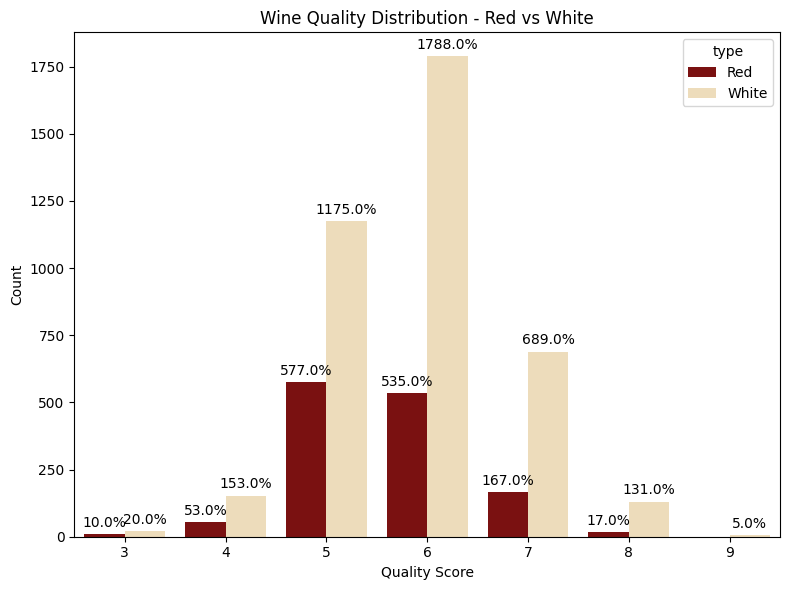

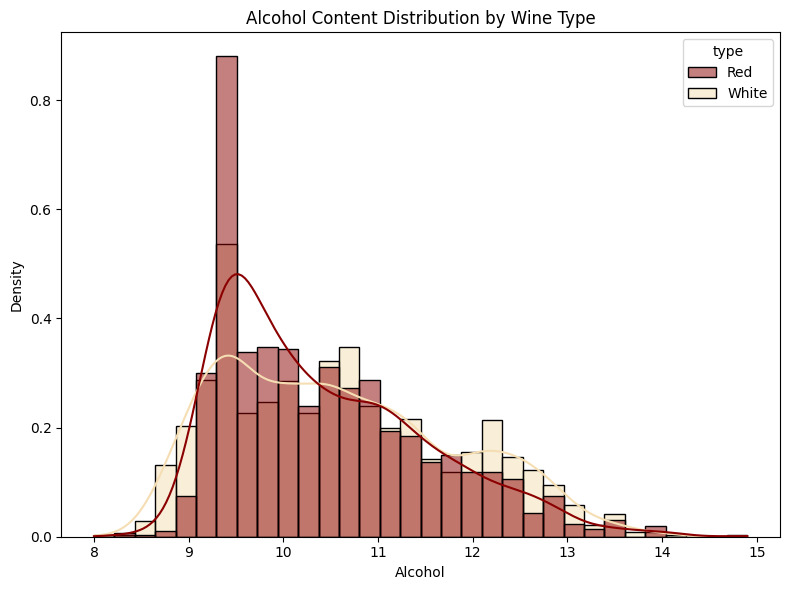

In [308]:
# Explorartory Data Analysis (EDA)
# Plotting Data(Visualisation)

# Combining datasets
combined_wine = pd.concat([red_wine, white_wine], axis=0)

# Quality Distribution - Combined Plot
plt.figure(figsize=(8, 6))

wine_colors = {'Red': '#8B0000', 'White': '#F5DEB3'}

ax = seaborn.countplot(x='quality', hue='type', data=combined_wine, palette=wine_colors)

plt.title("Wine Quality Distribution - Red vs White")
plt.xlabel("Quality Score")
plt.ylabel("Count")

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)
    
plt.tight_layout()
plt.show()

# Alcohol Distribution - Combined Histogram
plt.figure(figsize=(8, 6))

wine_colors = {'Red': '#8B0000', 'White': '#F5DEB3'}

seaborn.histplot(
    data=combined_wine,
    x='alcohol',
    hue='type',
    kde=True,
    stat='density',
    common_norm=False,
    palette=wine_colors
)

plt.title("Alcohol Content Distribution by Wine Type")
plt.xlabel("Alcohol")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


Red Wine Quality: 
quality
3    0.007358
4    0.038999
5    0.424577
6    0.393672
7    0.122884
8    0.012509
Name: proportion, dtype: float64

White Wine Quality: 
quality
3    0.005049
4    0.038627
5    0.296642
6    0.451401
7    0.173946
8    0.033072
9    0.001262
Name: proportion, dtype: float64


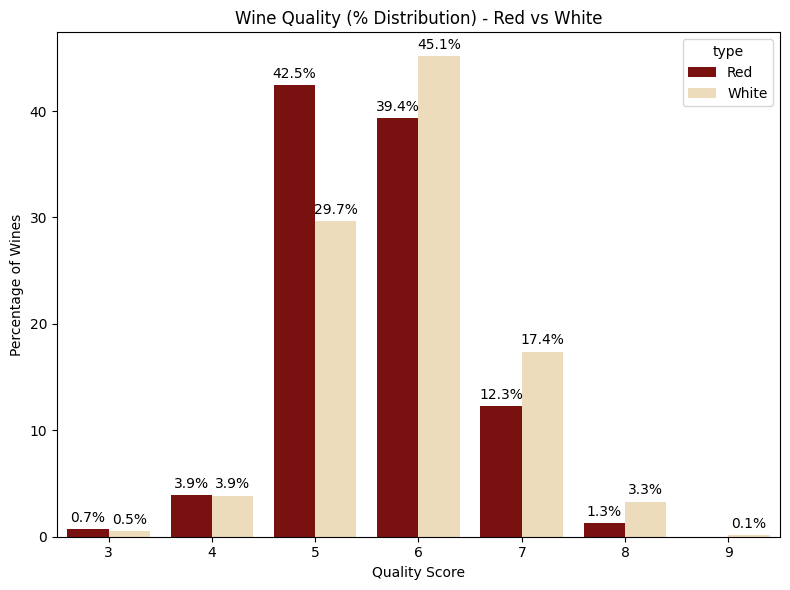

Average quality - Red: 5.6232523914643116
Average quality - White: 5.854834637717748

Red wines rated 7 or above: 13.539367181751288 %
White wines rated 7 or above: 20.82807371875789 %


In [309]:
# Task 1, Part A - Describe the distribution of wine quality across all samples, separately for red and white, and compare the quality distributions between reds and whites. Create suitable plots to illustrate.

print("Red Wine Quality: ")
print(red_wine['quality'].value_counts(normalize=True).sort_index())

print("\nWhite Wine Quality: ")
print(white_wine['quality'].value_counts(normalize=True).sort_index())

# Quality Distribution - Percentage
quality_counts = combined_wine.groupby(['type', 'quality']).size().reset_index(name='count')

totals = quality_counts.groupby('type')['count'].transform('sum')

quality_counts['percentage'] = 100 * quality_counts['count'] / totals

# Plot
plt.figure(figsize=(8, 6))
ax = seaborn.barplot(data=quality_counts, x='quality', y='percentage', hue='type', palette={'Red': '#8B0000', 'White': '#F5DEB3'})
plt.title("Wine Quality (% Distribution) - Red vs White")
plt.ylabel("Percentage of Wines")
plt.xlabel("Quality Score")

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()

# Mean Quality of both wine types
print("Average quality - Red:", red_wine['quality'].mean())
print("Average quality - White:", white_wine['quality'].mean())

print("\nRed wines rated 7 or above:", (red_wine['quality'] >= 7).mean() * 100, "%")
print("White wines rated 7 or above:", (white_wine['quality'] >= 7).mean() * 100, "%")


Interpretation Task 1 Part A
TODO

Red Wine - Alcohol Mean: 10.43
Red Wine - Alcohol Std Dev: 1.08
White Wine - Alcohol Mean: 10.59
White Wine - Alcohol Std Dev: 1.22
Red Wine - Alcohol Category Distribution:
alcohol_cat
mid     0.711
high    0.163
low     0.127
Name: proportion, dtype: float64

White Wine - Alcohol Category Distribution:
alcohol_cat
mid     0.641
high    0.189
low     0.170
Name: proportion, dtype: float64


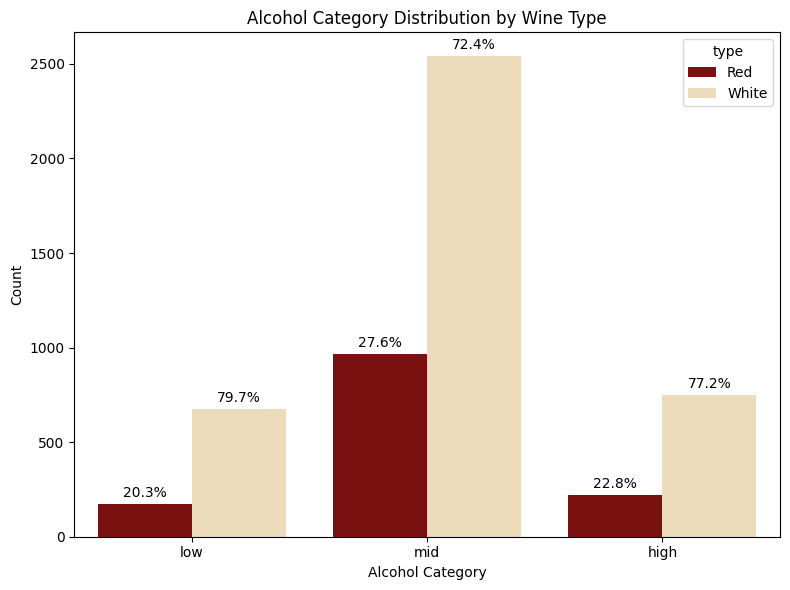

Red Wine - Avg Quality by Alcohol Category:
alcohol_cat
high    6.384615
low     5.180233
mid     5.527950
Name: quality, dtype: float64

White Wine - Avg Quality by Alcohol Category:
alcohol_cat
high    6.540830
low     5.396142
mid     5.774803
Name: quality, dtype: float64


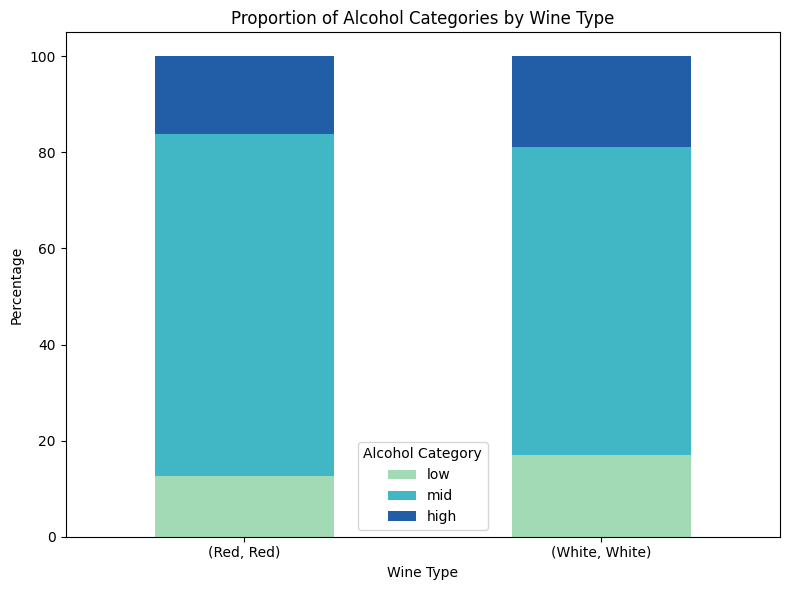

In [310]:
# Task 1, Part B Discretise the alcohol content variables (separately for whites and reds) into low, mid, high based on its distribution. Create a 3-valued "alcohol_cat" variable to represent this. low < (average - stddev) | (average - stddev) < mid < (average + stddev) | high > (average + stddev). 

import numpy as np
from pandas.api.types import CategoricalDtype

# Getting the mean and standard deviation of alcohol content
# Breakpoints Based on Statistics
# Rule used:
# low < (mean − stddev)
# mid = between (mean − stddev) and (mean + stddev)
# high > (mean + stddev)

red_alcohol_mean = red_wine['alcohol'].mean()
red_alcohol_std = red_wine['alcohol'].std()

print("Red Wine - Alcohol Mean:", round(red_alcohol_mean, 2))
print("Red Wine - Alcohol Std Dev:", round(red_alcohol_std, 2))

white_alcohol_mean = white_wine['alcohol'].mean()
white_alcohol_std = white_wine['alcohol'].std()

print("White Wine - Alcohol Mean:", round(white_alcohol_mean, 2))
print("White Wine - Alcohol Std Dev:", round(white_alcohol_std, 2))

# Red Wine
low_red = red_alcohol_mean - red_alcohol_std
high_red = red_alcohol_mean + red_alcohol_std

# White Wine
low_white = white_alcohol_mean - white_alcohol_std
high_white = white_alcohol_mean + white_alcohol_std

# Red wine categories
conditions_red = [
    red_wine['alcohol'] < low_red,
    red_wine['alcohol'] > high_red,
]
choice_red = ['low', 'high']
red_wine['alcohol_cat'] = np.select(conditions_red, choice_red, default='mid')

# Red wine categories
conditions_white = [
    white_wine['alcohol'] < low_white,
    white_wine['alcohol'] > high_white,
]
choice_white = ['low', 'high']
white_wine['alcohol_cat'] = np.select(conditions_white, choice_white, default='mid')

print("Red Wine - Alcohol Category Distribution:")
print(red_wine['alcohol_cat'].value_counts(normalize=True).round(3))

print("\nWhite Wine - Alcohol Category Distribution:")
print(white_wine['alcohol_cat'].value_counts(normalize=True).round(3))

# Add wine type for combined plot
red_wine['type'] = 'Red'
white_wine['type'] = 'White'

combined_wine = pd.concat([red_wine, white_wine], axis=0)

# Sort alcohol_cat consistently
cat_order = CategoricalDtype(categories=["low", "mid", "high"], ordered=True)
combined_wine['alcohol_cat'] = combined_wine['alcohol_cat'].astype(cat_order)

plt.figure(figsize=(8, 6))
ax = seaborn.countplot(data=combined_wine, x='alcohol_cat', hue='type', palette={'Red': '#8B0000', 'White': '#F5DEB3'})
plt.title("Alcohol Category Distribution by Wine Type")
plt.xlabel("Alcohol Category")
plt.ylabel("Count")

# Total Counts for each alocohol category
total_counts = combined_wine.groupby('alcohol_cat', observed=True)['type'].value_counts().unstack().fillna(0)

# Calculate column-wise percentages (by alcohol_cat)
percentages = total_counts.divide(total_counts.sum(axis=1), axis=0) * 100

for container in ax.containers:
    labels = []
    for bar in container:
        alcohol_cat = bar.get_x() + bar.get_width() / 2.0
        cat = bar.get_label()  # better to use bar index
        height = bar.get_height()
        x_pos = round(bar.get_x() + bar.get_width() / 2.0)
        
        alcohol_label = ax.get_xticklabels()[x_pos].get_text()
        total = total = total_counts.loc[alcohol_label].sum()
        pct = (height / total) * 100 if total else 0
        labels.append(f'{pct:.1f}%')
    ax.bar_label(container, labels=labels, padding=3)

plt.tight_layout()
plt.show()

# Average quality by alcohol category
print("Red Wine - Avg Quality by Alcohol Category:")
print(red_wine.groupby('alcohol_cat')['quality'].mean())

print("\nWhite Wine - Avg Quality by Alcohol Category:")
print(white_wine.groupby('alcohol_cat')['quality'].mean())

# Percentage Breakdown
alcohol_cat_dist = (
    combined_wine.groupby(['type', 'alcohol_cat'], observed=True).size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack()
    .fillna(0)
)

# Correct column order
alcohol_cat_dist = alcohol_cat_dist[["low", "mid", "high"]]

# Visual Plot
alcohol_cat_dist.plot(kind='bar', stacked=True, color=['#a1dab4', '#41b6c4', '#225ea8'], figsize=(8, 6))

plt.title("Proportion of Alcohol Categories by Wine Type")
plt.ylabel("Percentage")
plt.xlabel("Wine Type")
plt.xticks(rotation=0)
plt.legend(title='Alcohol Category')
plt.tight_layout()
plt.show()

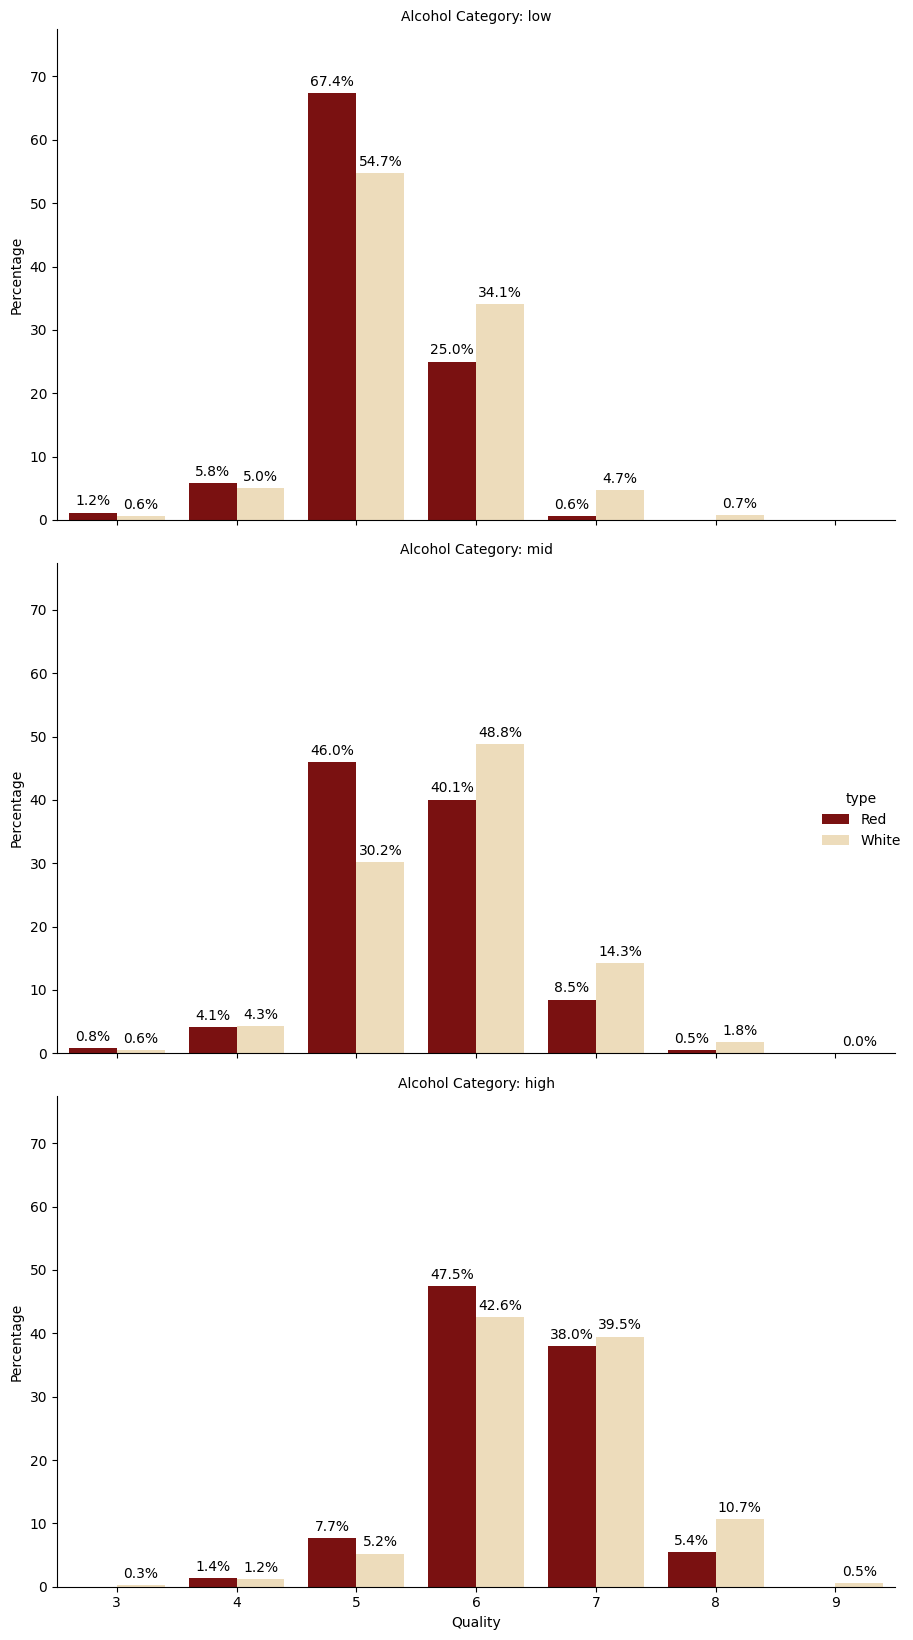

In [311]:
# Task 1, Part C - Describe the distribution of wine quality as in (1.A), but separately for low-, mid-, and high-alcohol content. Create suitable plots to illustrate. Can you draw any conclusions on the relationship between alcohol content and quality?

# The percentage Distribution of quality by alcohol category
quality_dist = (
    combined_wine.groupby(['alcohol_cat', 'type', 'quality'], observed=True)
    .size()
    .groupby(level=[0, 1], observed=True)
    .transform(lambda x: 100 * x / x.sum())
    .reset_index(name='percentage')
)

# Plotting
graph = seaborn.catplot(
    data=quality_dist,
    x='quality',
    y='percentage',
    hue='type',
    col='alcohol_cat',
    kind='bar',
    palette={'Red': '#8B0000', 'White': '#F5DEB3'},
    height=5.5,  
    aspect=1.5,  
    col_wrap=1  
)

graph.set_titles("Alcohol Category: {col_name}")
graph.set_axis_labels("Quality", "Percentage")
graph.set(ylim=(0, quality_dist['percentage'].max() + 10))

for ax in graph.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', padding=3) 

plt.tight_layout()
plt.show()

Conclusions Drawn from Task 1 Part C results
TODO

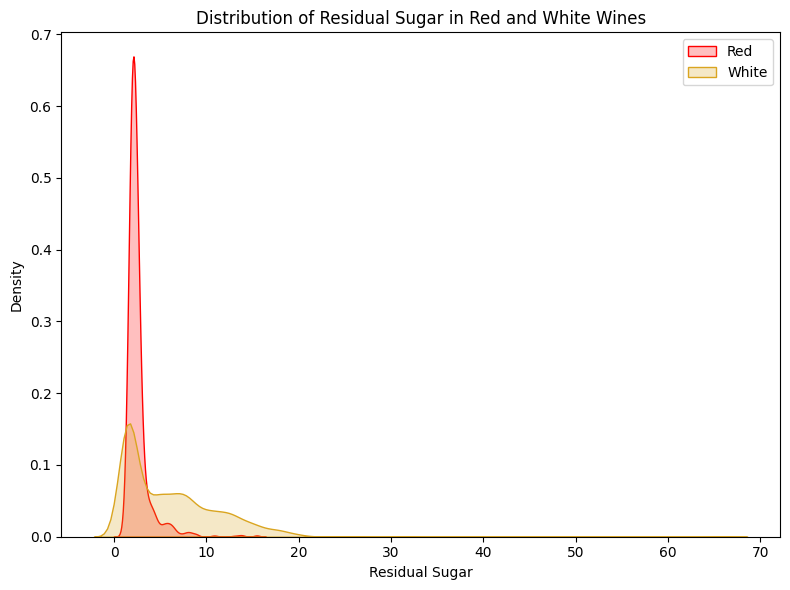

Chosen threshold for sweetness: 2.7
isSweet
0    0.50188
1    0.49812
Name: proportion, dtype: float64


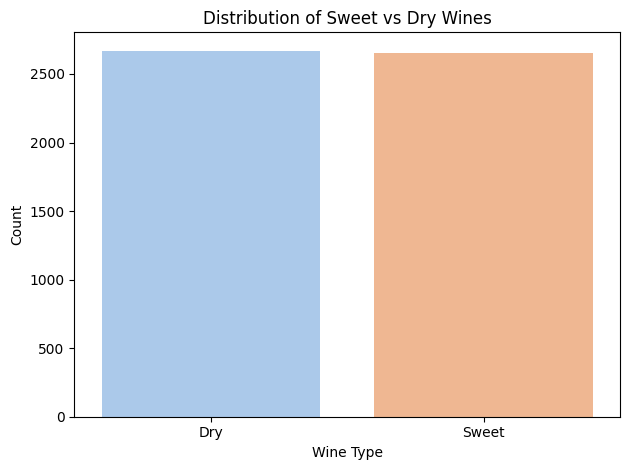

In [312]:
# Task 1, Part D - Plot the residual sugar variable and identify a suitable threshold to separate "sweet" from "dry" wines*. Create a new "isSweet" binary variable to represent these two classes. The distributions of residual sugar are skewed for both reds and whites (in fact most wines in this dataset are dry according to the official definition, e.g., https://winefolly.com/deep-dive/sugar-in-wine-chart/)Links to an external site.. A practical approach in this case is to pick a threshold that splits the dataset (almost) evenly, as that will give you two balanced classes for your classifier. So your task is to find a threshold such that each class has approximately the same number of records.

# Residual Sugar distribution Plot
plt.figure(figsize=(8, 6))
seaborn.kdeplot(red_wine['residual sugar'], label='Red', fill=True, color='red')
seaborn.kdeplot(white_wine['residual sugar'], label='White', fill=True, color='goldenrod')
plt.title("Distribution of Residual Sugar in Red and White Wines")
plt.xlabel("Residual Sugar")
plt.legend()
plt.tight_layout()
plt.show()

# Threshold
threshold = combined_wine['residual sugar'].median()
print("Chosen threshold for sweetness:", round(threshold, 2))

combined_wine['isSweet'] = (combined_wine['residual sugar'] > threshold).astype(int)

print(combined_wine['isSweet'].value_counts(normalize=True))

# Sweetness Distribution Plot
seaborn.countplot(data=combined_wine, x='isSweet', hue='isSweet', palette='pastel', legend=False)
plt.title("Distribution of Sweet vs Dry Wines")
plt.xticks([0, 1], ['Dry', 'Sweet'])
plt.ylabel("Count")
plt.xlabel("Wine Type")
plt.tight_layout()
plt.show()

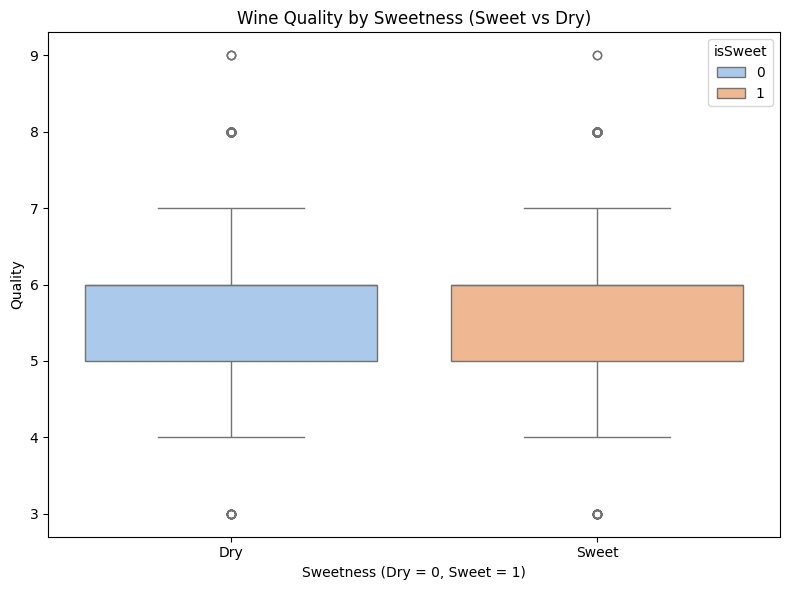

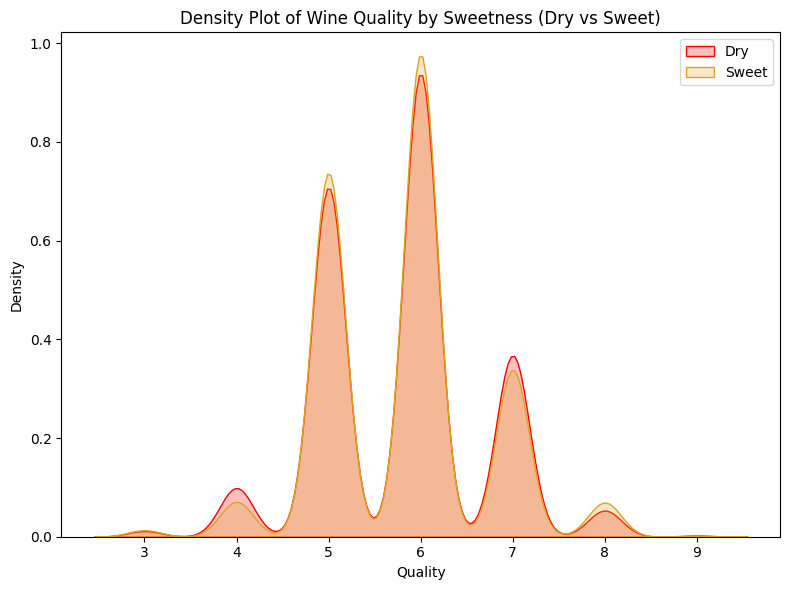

Average Quality by Sweetness (Dry = 0, Sweet = 1):
isSweet
0    5.789513
1    5.801887
Name: quality, dtype: float64

Median Quality by Sweetness (Dry = 0, Sweet = 1):
isSweet
0    6.0
1    6.0
Name: quality, dtype: float64


In [313]:
# Task 1, Part E - Using the threshold from (1.D), repeat the distribution analysis of quality vs isSweet. Are sweet wines perceived as lower or higher quality than dry wines?

# Quaity Distribution by isSweet (Sweet vs Dry), Box Plot
plt.figure(figsize=(8, 6))

# Boxplot or Violin plot
seaborn.boxplot(data=combined_wine, x='isSweet', y='quality', hue='isSweet', palette='pastel')
plt.title("Wine Quality by Sweetness (Sweet vs Dry)")
plt.xlabel("Sweetness (Dry = 0, Sweet = 1)")
plt.ylabel("Quality")
plt.xticks([0, 1], ['Dry', 'Sweet'])
plt.tight_layout()
plt.show()

# Density plot for quality by sweetness (Dry vs Sweet), Density Plot, for another way of Visualizing it
plt.figure(figsize=(8, 6))
seaborn.kdeplot(data=combined_wine[combined_wine['isSweet'] == 0], x='quality', label='Dry', fill=True, color='red')
seaborn.kdeplot(data=combined_wine[combined_wine['isSweet'] == 1], x='quality', label='Sweet', fill=True, color='goldenrod')
plt.title("Density Plot of Wine Quality by Sweetness (Dry vs Sweet)")
plt.xlabel("Quality")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# Mean and median quality comparison
mean_quality_by_sweetness = combined_wine.groupby('isSweet')['quality'].mean()
median_quality_by_sweetness = combined_wine.groupby('isSweet')['quality'].median()

print("Average Quality by Sweetness (Dry = 0, Sweet = 1):")
print(mean_quality_by_sweetness)

print("\nMedian Quality by Sweetness (Dry = 0, Sweet = 1):")
print(median_quality_by_sweetness)

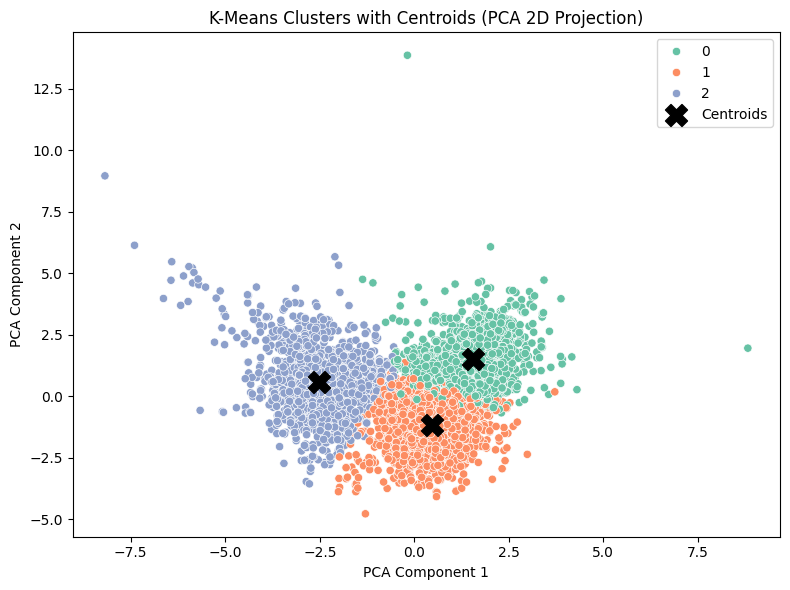


Cluster vs Wine Type:
 type      Red  White
cluster             
0           4   1420
1          51   2491
2        1304     50

Average Quality per Cluster:
 cluster
0    5.561798
1    6.045240
2    5.573117
Name: quality, dtype: float64


In [314]:
# K-Means Clustering - Combined Wine Data (without quality or categorical)
features_for_clustering = combined_wine.drop(columns=['quality', 'type', 'alcohol_cat', 'isSweet'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

kmeans = KMeans(n_clusters=3, random_state=42)
combined_wine['cluster'] = kmeans.fit_predict(scaled_features)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
scatter = seaborn.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=combined_wine['cluster'], palette='Set2')

centroids_original_space = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids_original_space)

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=250, c='black', marker='X', label='Centroids')

plt.title("K-Means Clusters with Centroids (PCA 2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.tight_layout()
plt.show()

# Cross-tabulation of clusters vs wine types (Red vs White)
cross_tab_type = pd.crosstab(combined_wine['cluster'], combined_wine['type'])
print("\nCluster vs Wine Type:\n", cross_tab_type)

# Average quality per cluster
cluster_quality = combined_wine.groupby('cluster')['quality'].mean()
print("\nAverage Quality per Cluster:\n", cluster_quality)


K-Means clustering may not provide valuable insights into wine quality prediction in this scenario. The results seem more driven by the wine type than by underlying patterns related to quality. It’s more of an exploratory step in understanding the data and storytelling rather than something that should be prioritized for predictive modeling.

Task 1, Part E
Are sweet wines perceived as lower or higher quality than dry wines?

Interpretation:
Very similar average and median quality: This suggests that sweet wines are, on average, not higher or lower quality than dry wines. The quality ratings are very similar, both on average and at the median.

Given the close average and median, it appears that there isn’t a strong correlation between sweetness and wine quality based on this dataset. This is interesting because you might expect that sweetness could influence how wine is perceived (with sweet wines potentially having higher quality ratings in some cases). But in this case, it looks quite balanced.

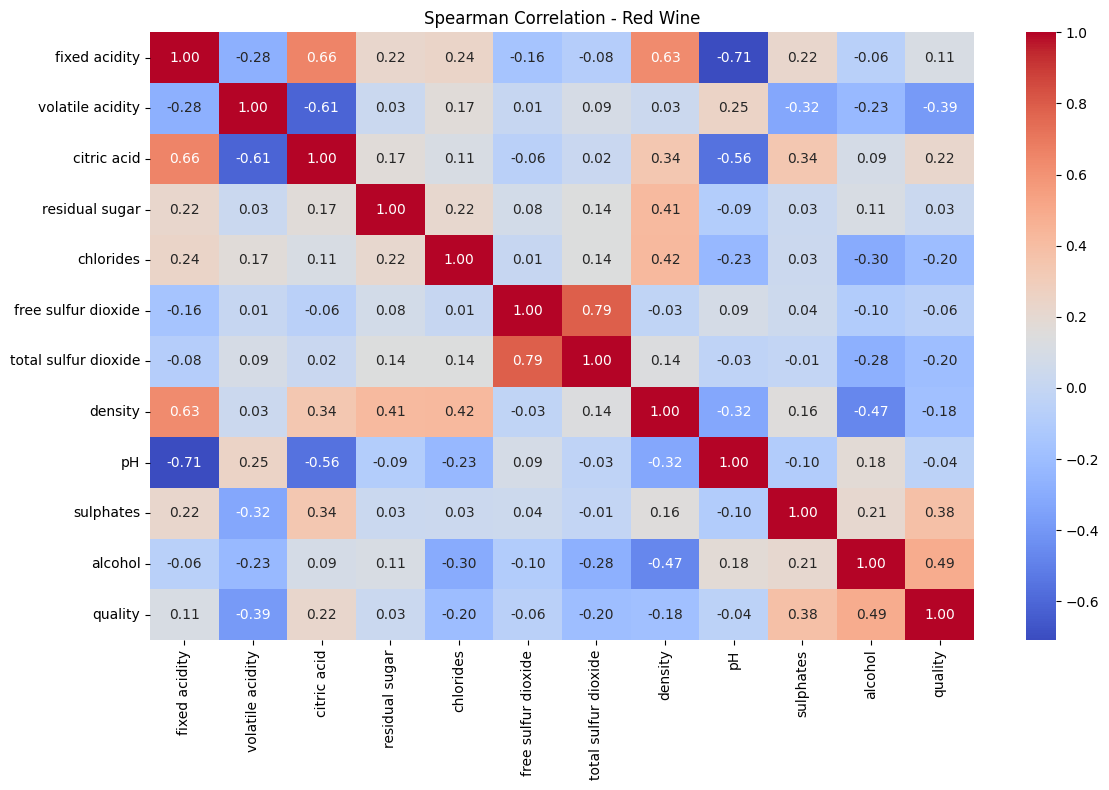


Red Wine Correlation Matrix:
                       fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.280162     0.657387   
volatile acidity          -0.280162          1.000000    -0.610925   
citric acid                0.657387         -0.610925     1.000000   
residual sugar             0.222396          0.031299     0.170096   
chlorides                  0.244095          0.170678     0.110679   
free sulfur dioxide       -0.157857          0.012162    -0.059585   
total sulfur dioxide      -0.083827          0.092548     0.021124   
density                    0.626628          0.032264     0.344303   
pH                        -0.708560          0.245973    -0.558594   
sulphates                  0.220696         -0.324207     0.341512   
alcohol                   -0.062696         -0.225714     0.090798   
quality                    0.111693         -0.387450     0.219427   

                      residual sugar  chlorides  free sulf

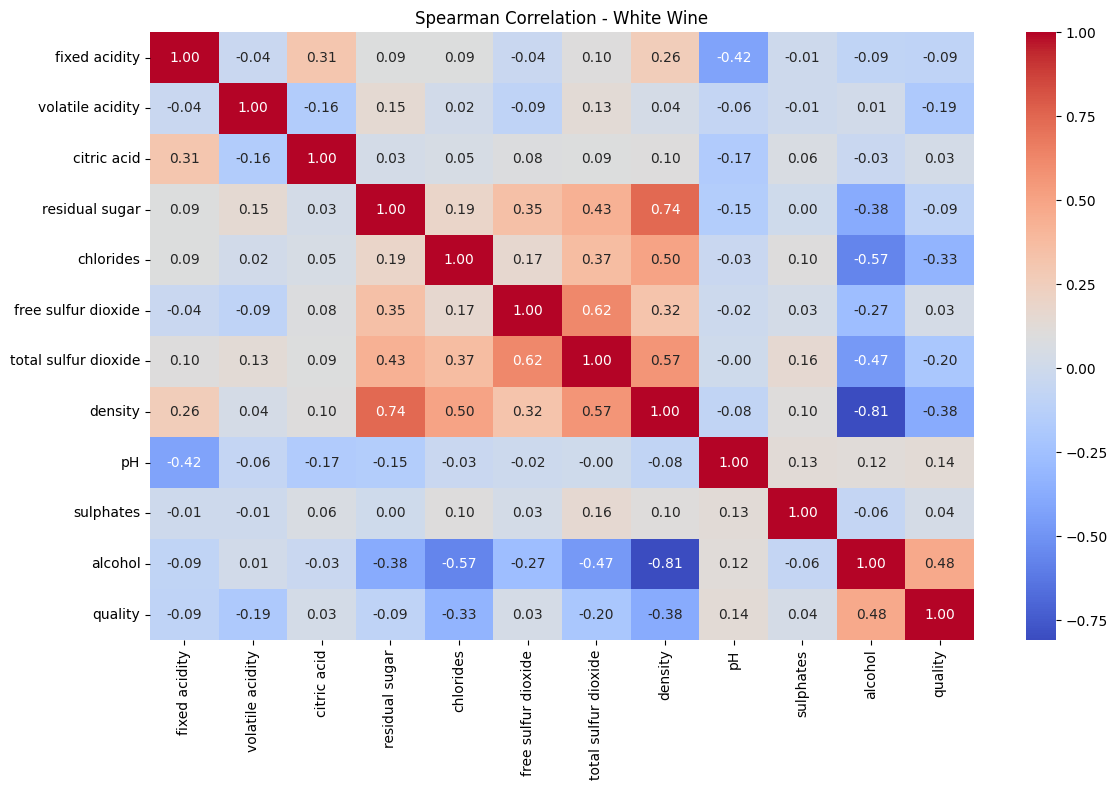


White Wine Correlation Matrix:
                       fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.037328     0.308689   
volatile acidity          -0.037328          1.000000    -0.161104   
citric acid                0.308689         -0.161104     1.000000   
residual sugar             0.092093          0.145917     0.030789   
chlorides                  0.090136          0.017037     0.047333   
free sulfur dioxide       -0.035506         -0.089430     0.084318   
total sulfur dioxide       0.096047          0.132091     0.089576   
density                    0.263979          0.037931     0.099580   
pH                        -0.420407         -0.062852    -0.169143   
sulphates                 -0.007606         -0.007954     0.062574   
alcohol                   -0.087765          0.013266    -0.034389   
quality                   -0.094236         -0.185385     0.030293   

                      residual sugar  chlorides  free su

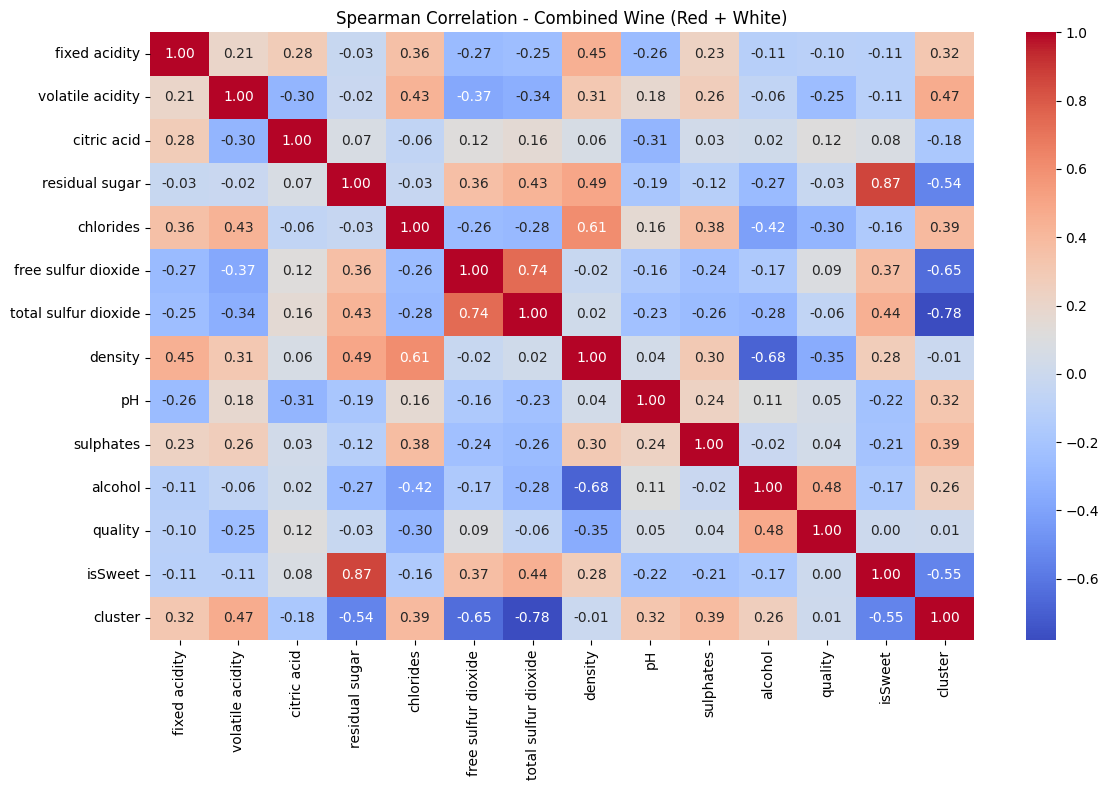


Combined Wine Correlation Matrix:
                       fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.206593     0.278841   
volatile acidity           0.206593          1.000000    -0.303870   
citric acid                0.278841         -0.303870     1.000000   
residual sugar            -0.025441         -0.021323     0.073252   
chlorides                  0.359324          0.432466    -0.062915   
free sulfur dioxide       -0.266580         -0.370346     0.117661   
total sulfur dioxide      -0.247357         -0.341317     0.156361   
density                    0.450184          0.310026     0.062847   
pH                        -0.262258          0.178650    -0.305331   
sulphates                  0.229855          0.263985     0.031671   
alcohol                   -0.113936         -0.061742     0.024059   
quality                   -0.104029         -0.251450     0.116477   
isSweet                   -0.111299         -0.107972 

In [315]:
"""
Task 2 - Try and determine which subset of your variables can be most useful for learning
This is in preparation to applying machine learning to create your model. To do this, analyse correlations between:

- Each pair of variables
- Each variable and the outcome (quality)
-Produce a visual representation of the Correlation Matrix, using  seaborn, matplotlib, or AltairLinks to an external site.
Comment on how some of the variables may relate to others. For this task, you may use Pandas methods to automatically create correlation matrices, for example
 DataFrame.corr. Take care when using the correct metrics, i.e. you must choose between {‘pearson’, ‘kendall’, ‘spearman’}. Consult the documentation to 
 learn about these metrics.
"""

# Correlation Heatmap - Spearmans Correlation 
red_corr = red_wine.select_dtypes(include='number').corr(method='spearman') # Red Wine

plt.figure(figsize=(12, 8))
seaborn.heatmap(red_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation - Red Wine')
plt.tight_layout()
plt.show()

print("\nRed Wine Correlation Matrix:\n", red_corr)

white_corr = white_wine.select_dtypes(include='number').corr(method='spearman') # White Wine

plt.figure(figsize=(12, 8))
seaborn.heatmap(white_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation - White Wine')
plt.tight_layout()
plt.show()

print("\nWhite Wine Correlation Matrix:\n", white_corr)

# Combined Correlation Heatmap
combined_corr = combined_wine.select_dtypes(include='number').corr(method='spearman')

plt.figure(figsize=(12, 8))
seaborn.heatmap(combined_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation - Combined Wine (Red + White)')
plt.tight_layout()
plt.show()

print("\nCombined Wine Correlation Matrix:\n", combined_corr)

#  if two variables carry too much of the same signal, it may confuse or overfit your model — so this helps in feature selection.
# Good Predictors of Quality:
# alcohol → 0.45 correlation with quality → moderate positive.

# volatile acidity → -0.26 → inverse relationship (more acidity = lower quality).

# density → -0.32 → Higher density, generally lower quality.

# chlorides → -0.30 → More saltiness = worse perception.

In [316]:
# Filter correlations with 'quality' only
red_quality_corr = red_corr['quality'].sort_values(key=abs, ascending=False)
white_quality_corr = white_corr['quality'].sort_values(key=abs, ascending=False)
combined_quality_corr = combined_corr['quality'].sort_values(key=abs, ascending=False)

print("\nRed Wine - Correlation with Quality:\n", red_quality_corr)
print("\nWhite Wine - Correlation with Quality:\n", white_quality_corr)
print("\nCombined Wine - Correlation with Quality:\n", combined_quality_corr)



Red Wine - Correlation with Quality:
 quality                 1.000000
alcohol                 0.487965
volatile acidity       -0.387450
sulphates               0.380581
citric acid             0.219427
chlorides              -0.204360
total sulfur dioxide   -0.196620
density                -0.184302
fixed acidity           0.111693
free sulfur dioxide    -0.058746
pH                     -0.042738
residual sugar          0.025749
Name: quality, dtype: float64

White Wine - Correlation with Quality:
 quality                 1.000000
alcohol                 0.475713
density                -0.382900
chlorides              -0.333089
total sulfur dioxide   -0.202576
volatile acidity       -0.185385
pH                      0.136190
fixed acidity          -0.094236
residual sugar         -0.092462
sulphates               0.035592
free sulfur dioxide     0.032555
citric acid             0.030293
Name: quality, dtype: float64

Combined Wine - Correlation with Quality:
 quality                 

The combined Spearman correlation matrix helps identify variables with strong predictive power 
for wine quality, such as alcohol (positive correlation) and volatile acidity (negative correlation). 
It also highlights features that are highly interrelated, such as residual sugar and isSweet. 
This analysis supports informed feature selection for the next phase of machine learning modeling.

Selected Features
1. alcohol
Red Wine Correlation: +0.478

White Wine Correlation: +0.440

Alcohol has the strongest positive correlation with quality in both red and white wine.

This makes intuitive sense — wines with higher alcohol content often come from riper grapes and may be perceived as fuller-bodied or better crafted.

2. volatile acidity
Red Wine: -0.381

White Wine: -0.197

A strong negative correlation, especially in red wine.

High volatile acidity usually indicates spoilage or undesired fermentation processes, reducing quality perception.

3. sulphates
Red Wine: +0.377

White Wine: +0.033 (very weak)

Sulphates contribute to wine’s preservation and antimicrobial stability.

Strong positive influence in red wine, weaker in white — but still potentially useful, especially for red-specific models.

4. chlorides
Red Wine: -0.190

White Wine: -0.314

Higher salt (chloride) content negatively impacts perceived wine quality, particularly in white wine.

5. density
Red Wine: -0.177

White Wine: -0.348

Density is tied to sugar and alcohol levels. Here, it shows a negative correlation, possibly reflecting the fact that lighter wines are often rated higher unless they're dessert wines.

6. citric acid
Red Wine: +0.213

White Wine: +0.018 (minimal)

Provides acidity and freshness, mildly helpful in red wines. Weak influence in white wine, but still worth tracking depending on model type.

Not Selected
These were excluded due to very weak correlations (close to 0), inconsistent effects, or potential redundancy:

pH, residual sugar, free sulfur dioxide, fixed acidity, total sulfur dioxide

These may still be valuable in nonlinear models or via interaction terms, but they're not strong standalone predictors.

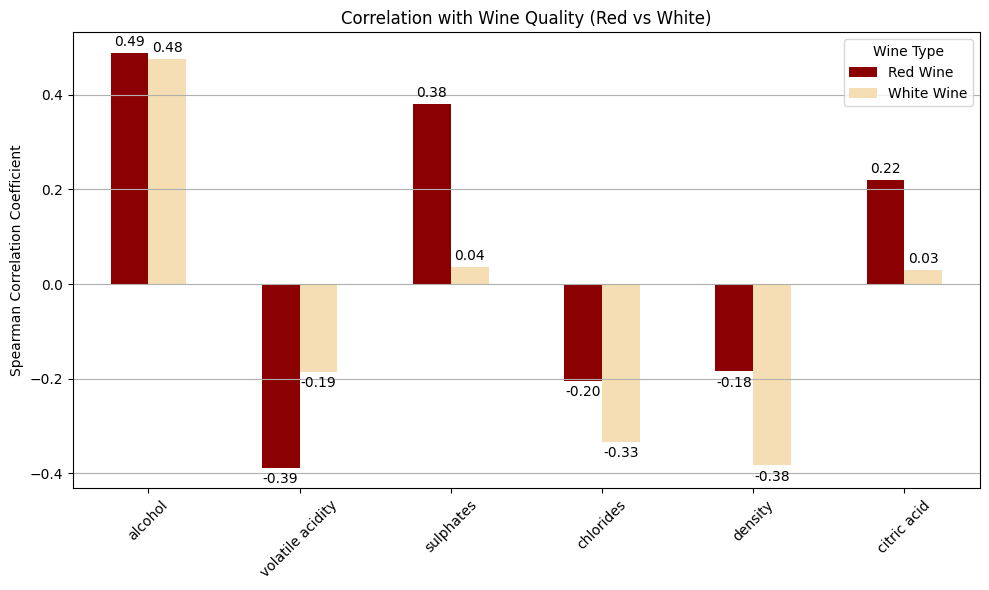

In [317]:
# Evaluating features that correlate with the quality, seprately for red and white wines.

# Correlation with 'quality' for selected features only
selected_features = ['alcohol', 'volatile acidity', 'sulphates', 'chlorides', 'density', 'citric acid']

red_corr = red_wine[selected_features + ['quality']].corr(method='spearman')['quality'].drop('quality')
white_corr = white_wine[selected_features + ['quality']].corr(method='spearman')['quality'].drop('quality')

corr_dataframe = pd.DataFrame({
    'Red Wine': red_corr,
    'White Wine': white_corr
})

ax = corr_dataframe.plot(kind='bar', figsize=(10, 6), color=['#8B0000', '#F5DEB3'])

plt.title('Correlation with Wine Quality (Red vs White)')
plt.ylabel('Spearman Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Wine Type')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()



--- Threshold: 5 ---
Confusion Matrix:
 [[  0  13]
 [  0 259]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        13
           1       0.95      1.00      0.98       259

    accuracy                           0.95       272
   macro avg       0.98      0.50      0.49       272
weighted avg       0.95      0.95      0.93       272

Accuracy Score: 0.9522


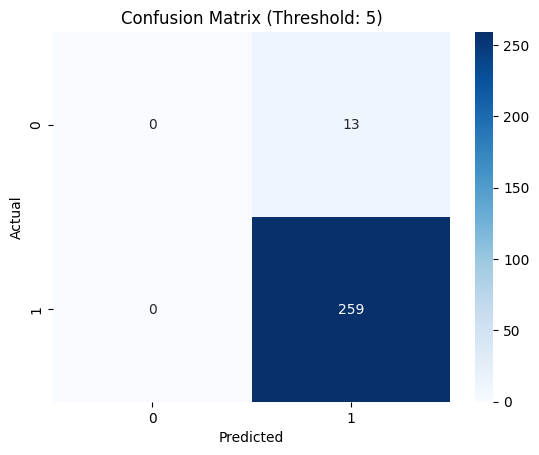


--- Threshold: 6 ---
Confusion Matrix:
 [[94 34]
 [45 99]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.73      0.70       128
           1       0.74      0.69      0.71       144

    accuracy                           0.71       272
   macro avg       0.71      0.71      0.71       272
weighted avg       0.71      0.71      0.71       272

Accuracy Score: 0.7096


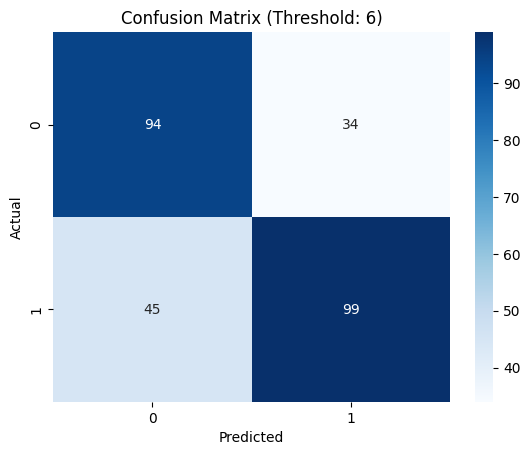


--- Threshold: 7 ---
Confusion Matrix:
 [[230   5]
 [ 30   7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       235
           1       0.58      0.19      0.29        37

    accuracy                           0.87       272
   macro avg       0.73      0.58      0.61       272
weighted avg       0.84      0.87      0.84       272

Accuracy Score: 0.8713


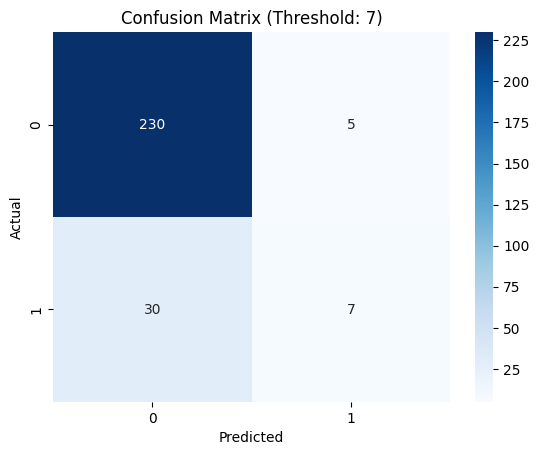


--- Threshold: 9 ---
Skipping threshold 9: only one class present in the data.


In [318]:
"""Task 3- Experiment with one or more machine learning approaches
 
This creates a predictive model for quality. Some options are:
Consider this as a classification problem. You can do this by considering the quality labels, ie. '5', '6', ... '9' and reducing the number of possible labels to two (binary classification). You should experiment with different thresholds and compare results, for instance define "low" to be quality <6, "high" >=6, then change the threshold to 5 or 7, etc. 
Consider this a regression problem, where quality is now a continuous variable.
"""

"""
To Choose a Machine Learning Model, need to think about what type of data do we have and what we want to do with it.
"""

# Logistic Regression for Binary Classification

# Selected features
features = ['alcohol', 'volatile acidity', 'sulphates', 'chlorides', 'density', 'citric acid']
thresholds = [5, 6, 7, 9]

results = {}

for thresh in thresholds:
    print(f"\n--- Threshold: {thresh} ---")

    # Binary target
    red_wine_binary = red_wine.copy()
    red_wine_binary['quality_binary'] = (red_wine_binary['quality'] >= thresh).astype(int)

    X = red_wine_binary[features]
    y = red_wine_binary['quality_binary']

    # Skip if only one class present
    if len(y.unique()) < 2:
        print(f"Skipping threshold {thresh}: only one class present in the data.")
        continue

    # Train/test split with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Predictions and evaluation
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

  
    results[thresh] = {
        'accuracy': acc,
        'confusion_matrix': cm,
        'report': report
    }

    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))
    print("Accuracy Score:", round(acc, 4))

    seaborn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Threshold: {thresh})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



--- Threshold: 5 ---
Confusion Matrix:
 [[  0  13]
 [  0 259]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        13
           1       0.95      1.00      0.98       259

    accuracy                           0.95       272
   macro avg       0.98      0.50      0.49       272
weighted avg       0.95      0.95      0.93       272

Accuracy Score: 0.9522058823529411


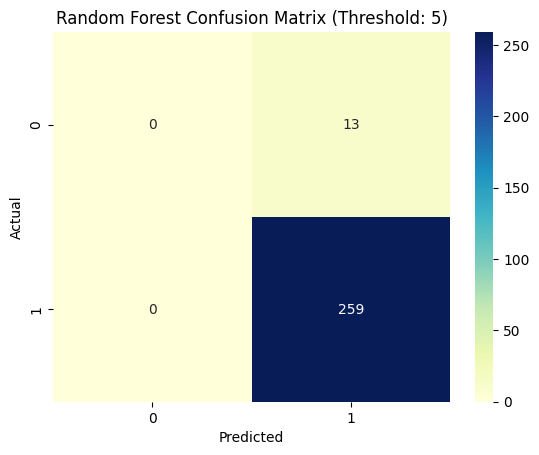


--- Threshold: 6 ---
Confusion Matrix:
 [[ 95  33]
 [ 33 111]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       128
           1       0.77      0.77      0.77       144

    accuracy                           0.76       272
   macro avg       0.76      0.76      0.76       272
weighted avg       0.76      0.76      0.76       272

Accuracy Score: 0.7573529411764706


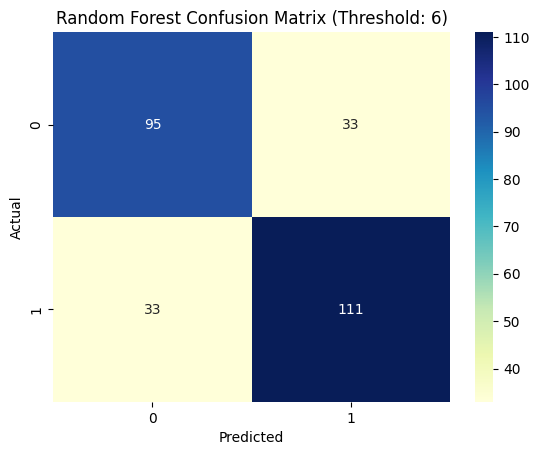


--- Threshold: 7 ---
Confusion Matrix:
 [[228   7]
 [ 25  12]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       235
           1       0.63      0.32      0.43        37

    accuracy                           0.88       272
   macro avg       0.77      0.65      0.68       272
weighted avg       0.86      0.88      0.87       272

Accuracy Score: 0.8823529411764706


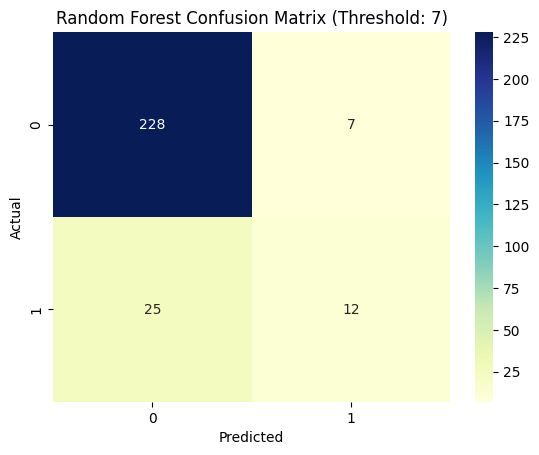


--- Threshold: 9 ---
Only one class present in target, skipping this threshold.


In [319]:
# Random Forrest Classifier

# Feature set
features = ['alcohol', 'volatile acidity', 'sulphates', 'chlorides', 'density', 'citric acid']

# Thresholds to try
thresholds = [5, 6, 7, 9]

# Store results
results = {}

for threshold in thresholds:
    print(f"\n--- Threshold: {threshold} ---")
    
    # Binary classification based on threshold
    red_wine_binary = red_wine.copy()
    red_wine_binary['quality_binary'] = (red_wine_binary['quality'] >= threshold).astype(int)

    # Features & target
    X = red_wine_binary[features]
    y = red_wine_binary['quality_binary']
    
    if len(y.unique()) < 2:
        print("Only one class present in target, skipping this threshold.")
        continue

    # Train/test split (80/20)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Predictions and evaluation
    y_pred = rf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))
    print("Accuracy Score:", acc)

    results[threshold] = acc

    seaborn.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Random Forest Confusion Matrix (Threshold: {threshold})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Comparison Between Logistic Regression Classification & Random Forest Classification

Mean Absolute Error (MAE): 0.49
Mean Squared Error (MSE): 0.41
R² Score: 0.42


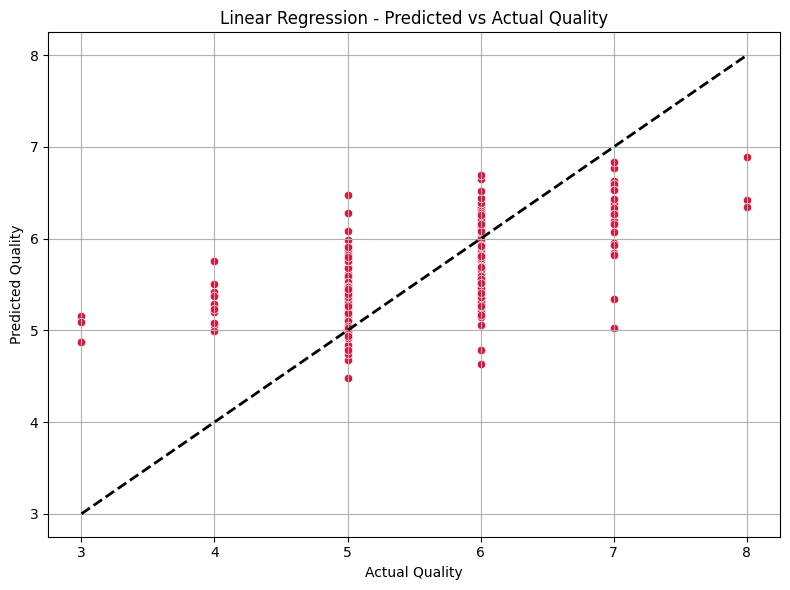

In [320]:
# Linear Regression

# Features
features = ['alcohol', 'volatile acidity', 'sulphates', 'chlorides', 'density', 'citric acid']

# Features (X) and Target (Y)
X = red_wine[features]
y = red_wine['quality']

# Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

plt.figure(figsize=(8, 6))
seaborn.scatterplot(x=y_test, y=y_pred, color='crimson')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Perfect prediction line
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Linear Regression - Predicted vs Actual Quality')
plt.grid(True)
plt.tight_layout()
plt.show()


Mean Absolute Error (MAE): 0.49
Mean Squared Error (MSE): 0.42
R² Score: 0.4


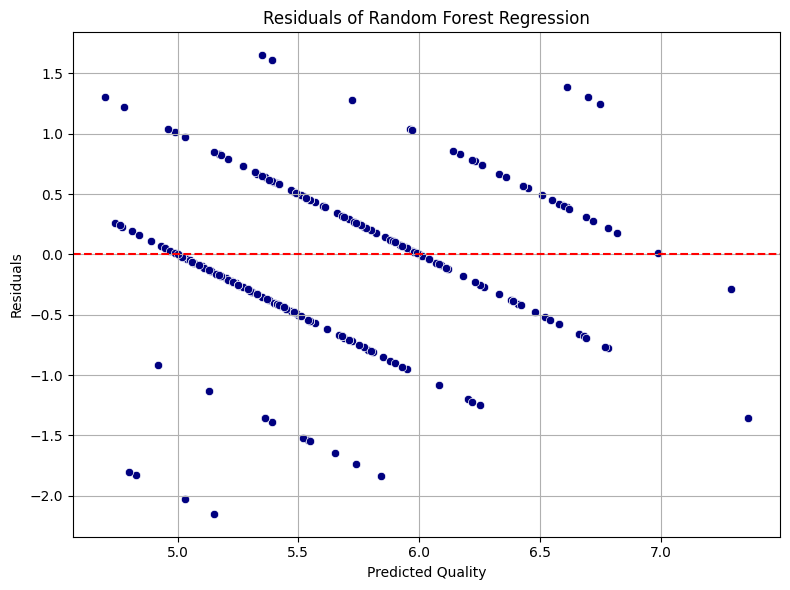

In [321]:
# Random Forest Regression

features = ['alcohol', 'volatile acidity', 'sulphates', 'chlorides', 'density', 'citric acid']
X = red_wine[features]
y = red_wine['quality']

# Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("R² Score:", round(r2, 2))

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
seaborn.scatterplot(x=y_pred, y=residuals, color='navy', edgecolor='white')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Quality')
plt.ylabel('Residuals')
plt.title('Residuals of Random Forest Regression')
plt.grid(True)
plt.tight_layout()
plt.show()